# Question Q7

*Question*: To what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.

*Answer Type*: Numerical

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

### Basic Analysis

In [4]:
dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort'].head()

0     70
1    -77
2     30
3     50
4     20
Name: Q7_ML_Solution_Optimality_Extra_Effort, dtype: object

In [5]:
# cleaning data
dataframe_obj.remove_value_from_df('-77','Q7_ML_Solution_Optimality_Extra_Effort')

In [6]:
# convert column to integer - if you read before this line, you will get an string like '14'
dataframe_obj.df = dataframe_obj.df.astype({"Q7_ML_Solution_Optimality_Extra_Effort": int}, errors='raise') 

In [7]:
# plot object for bootstrapped data
q7_plot = PlotUtils(pd.DataFrame(
    data={'ML Solution Optimality': list(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort'])}
))

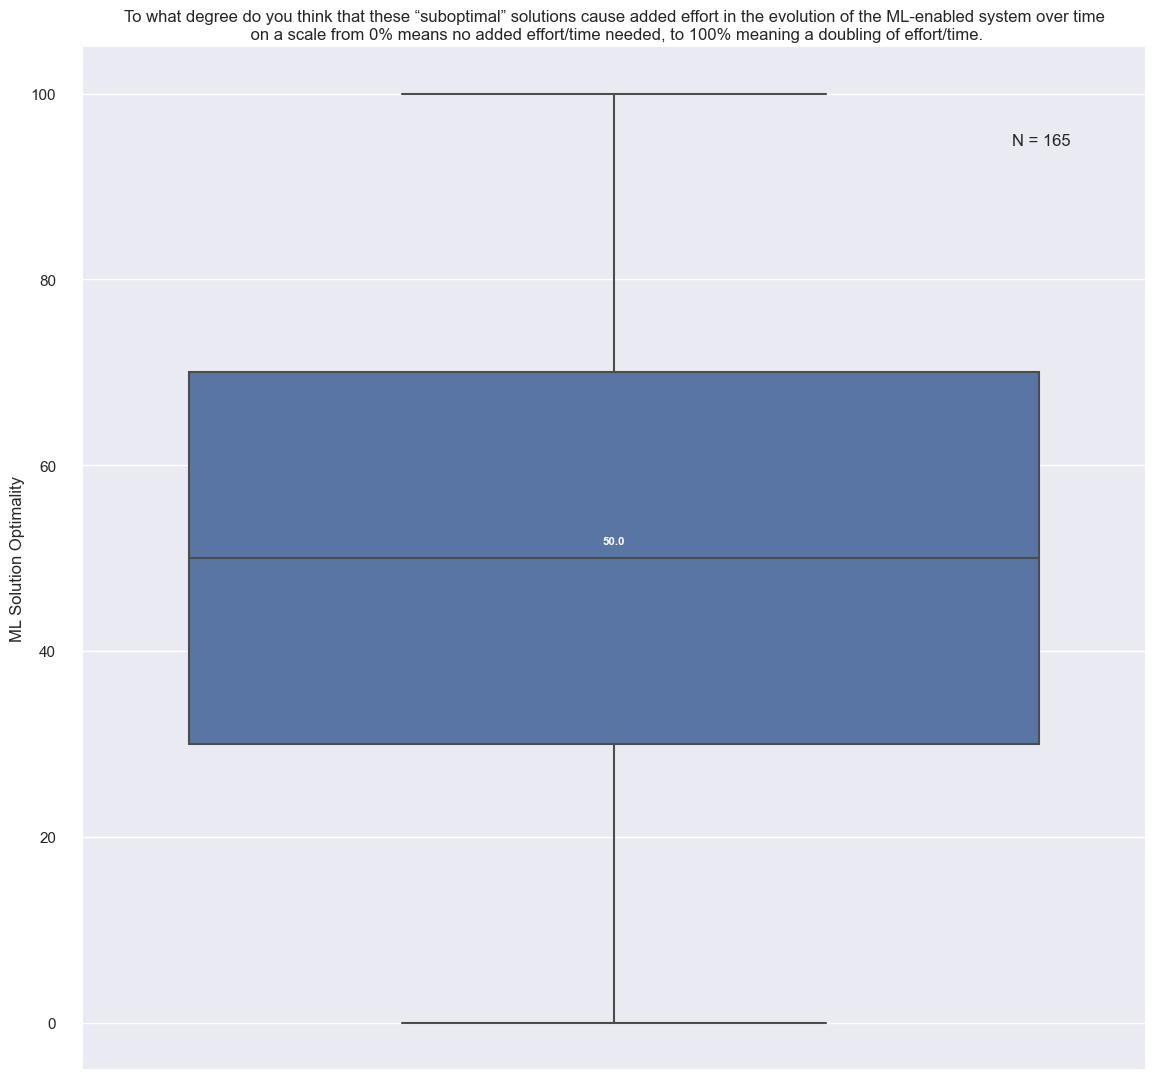

In [8]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort']))
total_answers_int = len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort'])

q7_plot.single_boxplot("ML Solution Optimality",
                       title="To what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.",
                       total_answers=total_answers)

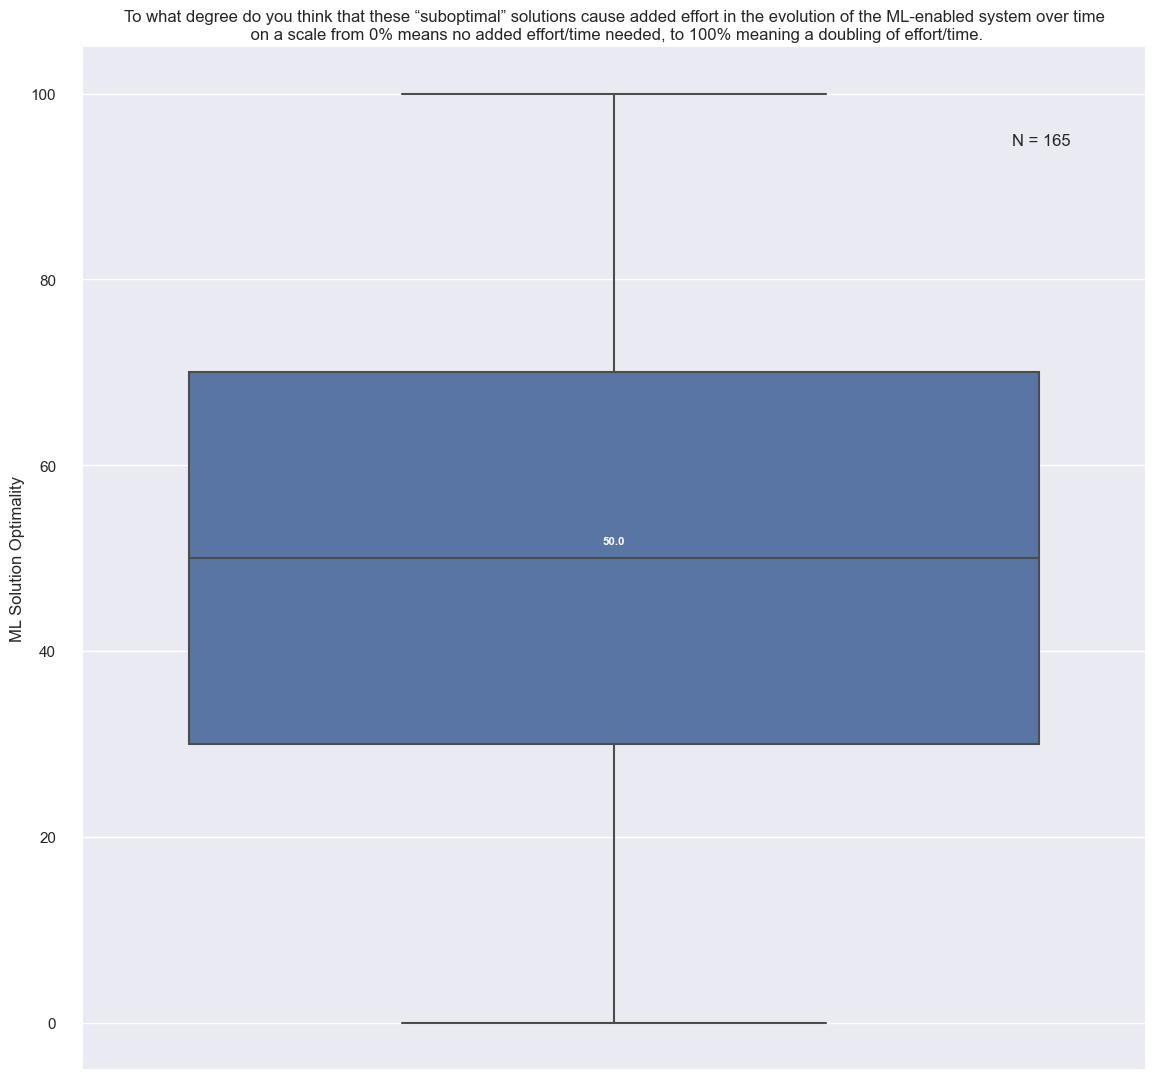

In [9]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort']))
total_answers_int = len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort'])

q7_plot.single_boxplot("ML Solution Optimality", outliers=False,
                       title="To what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.",
                       total_answers=total_answers)

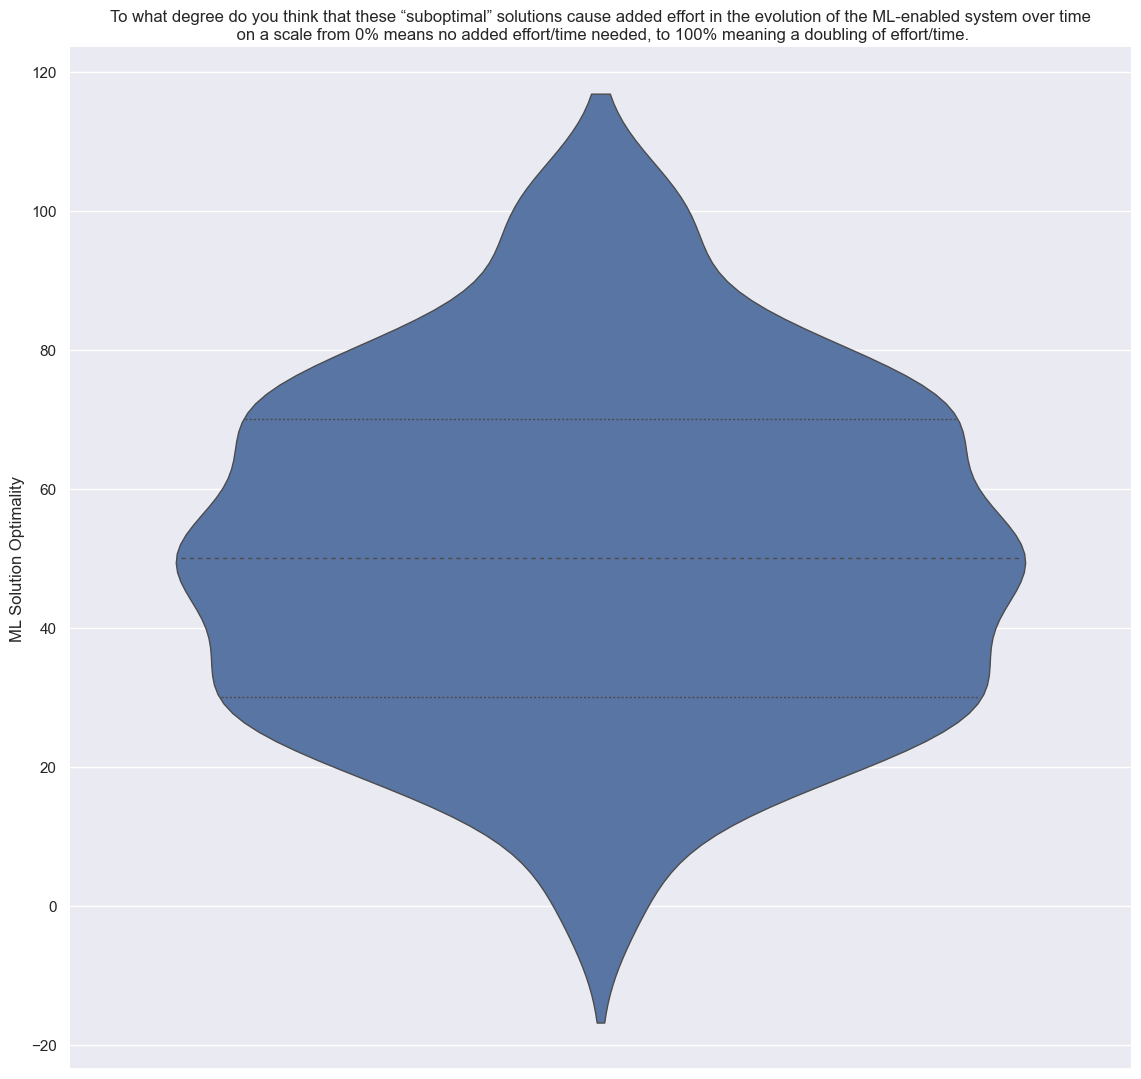

In [10]:
q7_plot.single_violinplot("ML Solution Optimality",
                          title="To what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.")

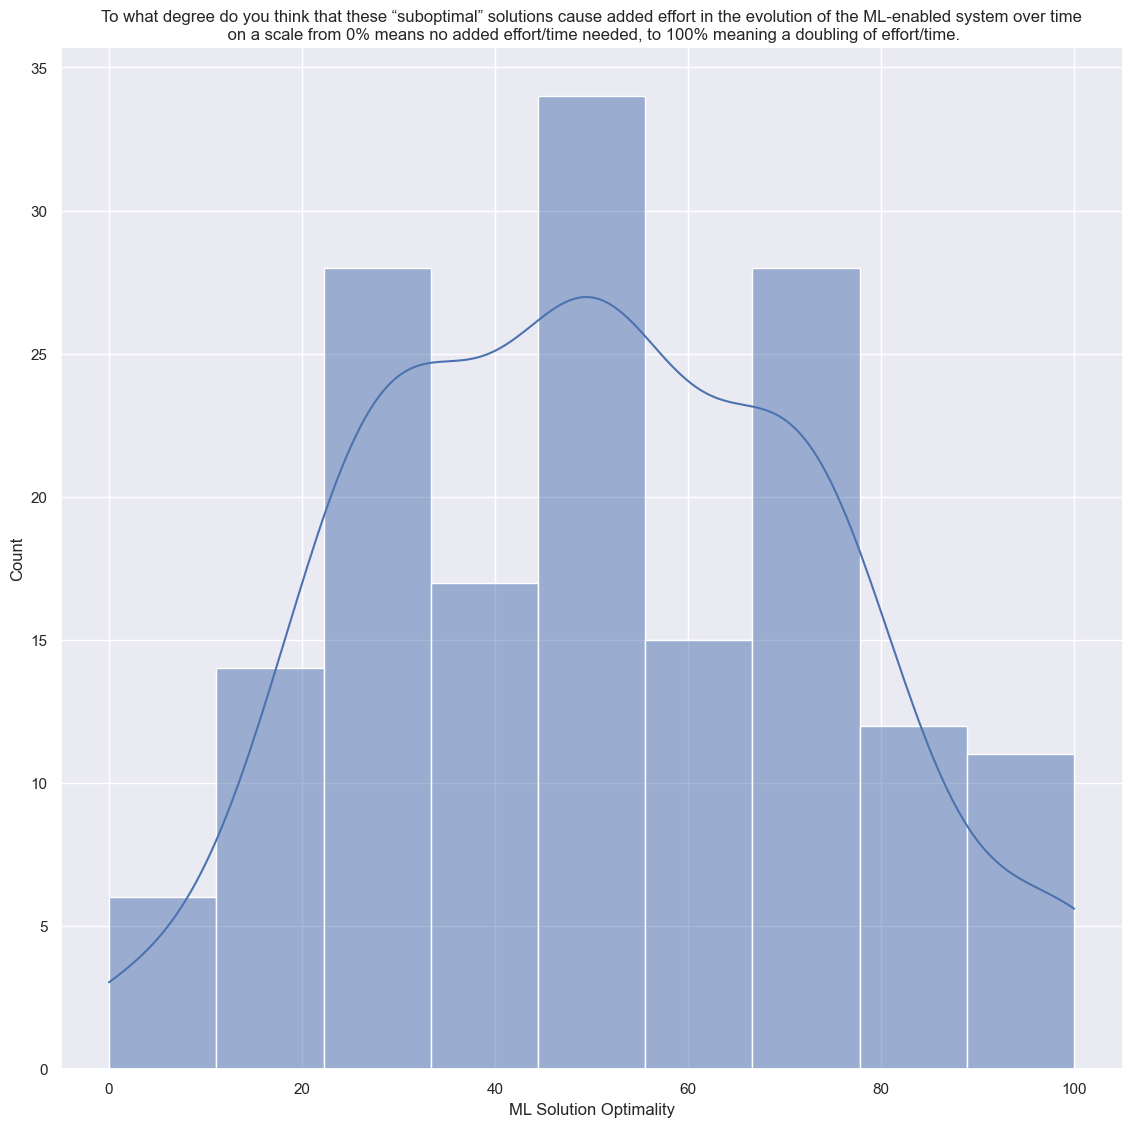

In [11]:
q7_plot.single_histplot("ML Solution Optimality",
                        title="To what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.")

### Bootstrapping Analysis

In [12]:
valid_answers_list = list(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort'])

total_answers_int = len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort'])

In [13]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, [], replacements, population_sample_size, 95)

In [14]:
bootstrapped_list_data = bootstrapping_obj.bootstrapping_numerical_fields()

In [15]:
# plot object for bootstrapped data
q7_boot_plot = PlotUtils(pd.DataFrame(
    data={'ML Solution Optimality': bootstrapped_list_data['population']}
))

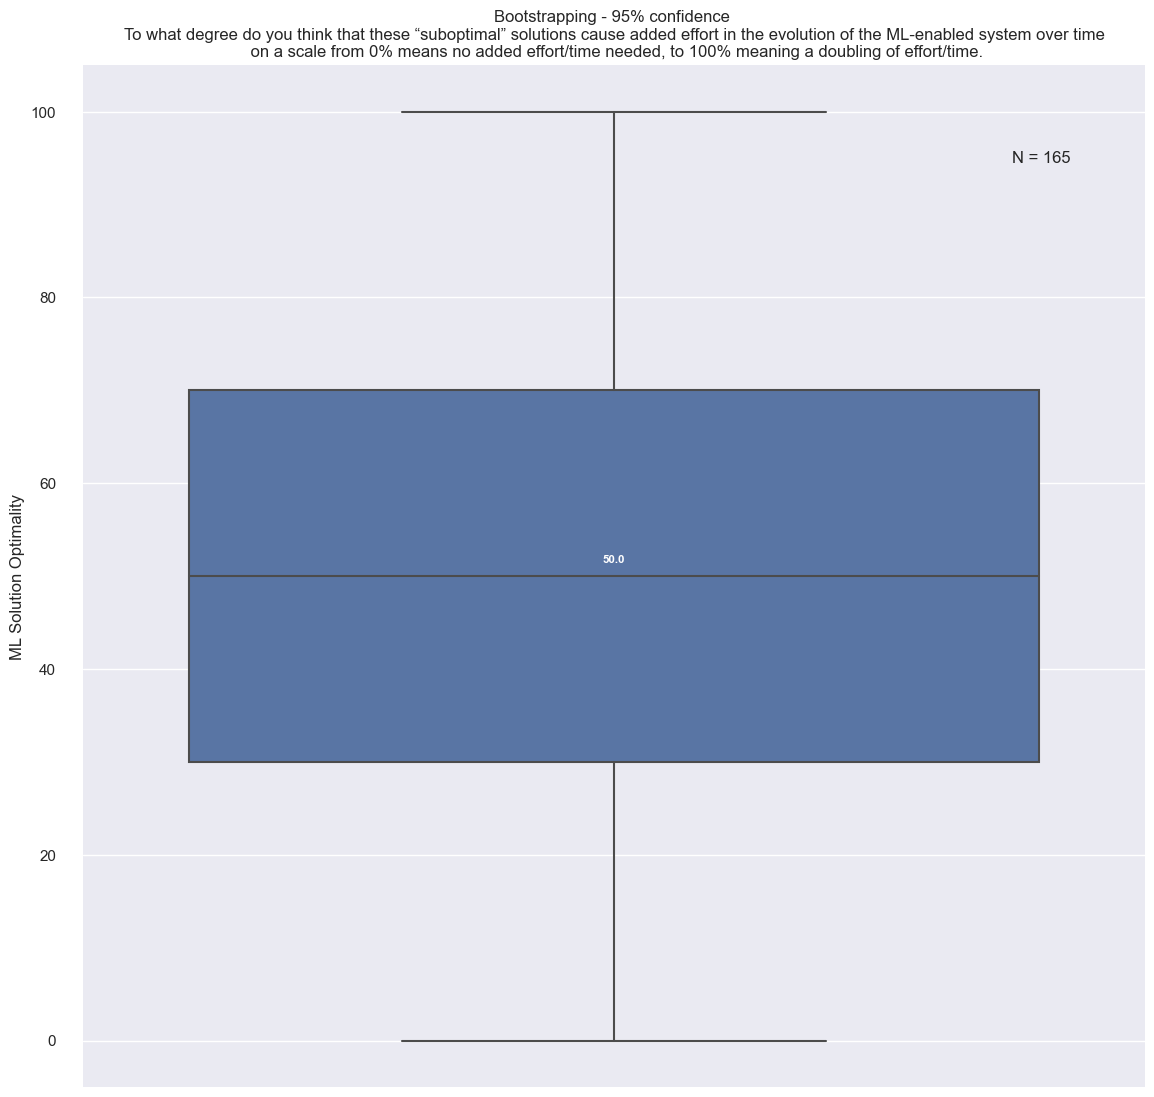

In [16]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort']))

q7_boot_plot.single_boxplot("ML Solution Optimality",
                            title="Bootstrapping - 95% confidence \nTo what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.",
                            total_answers=total_answers)

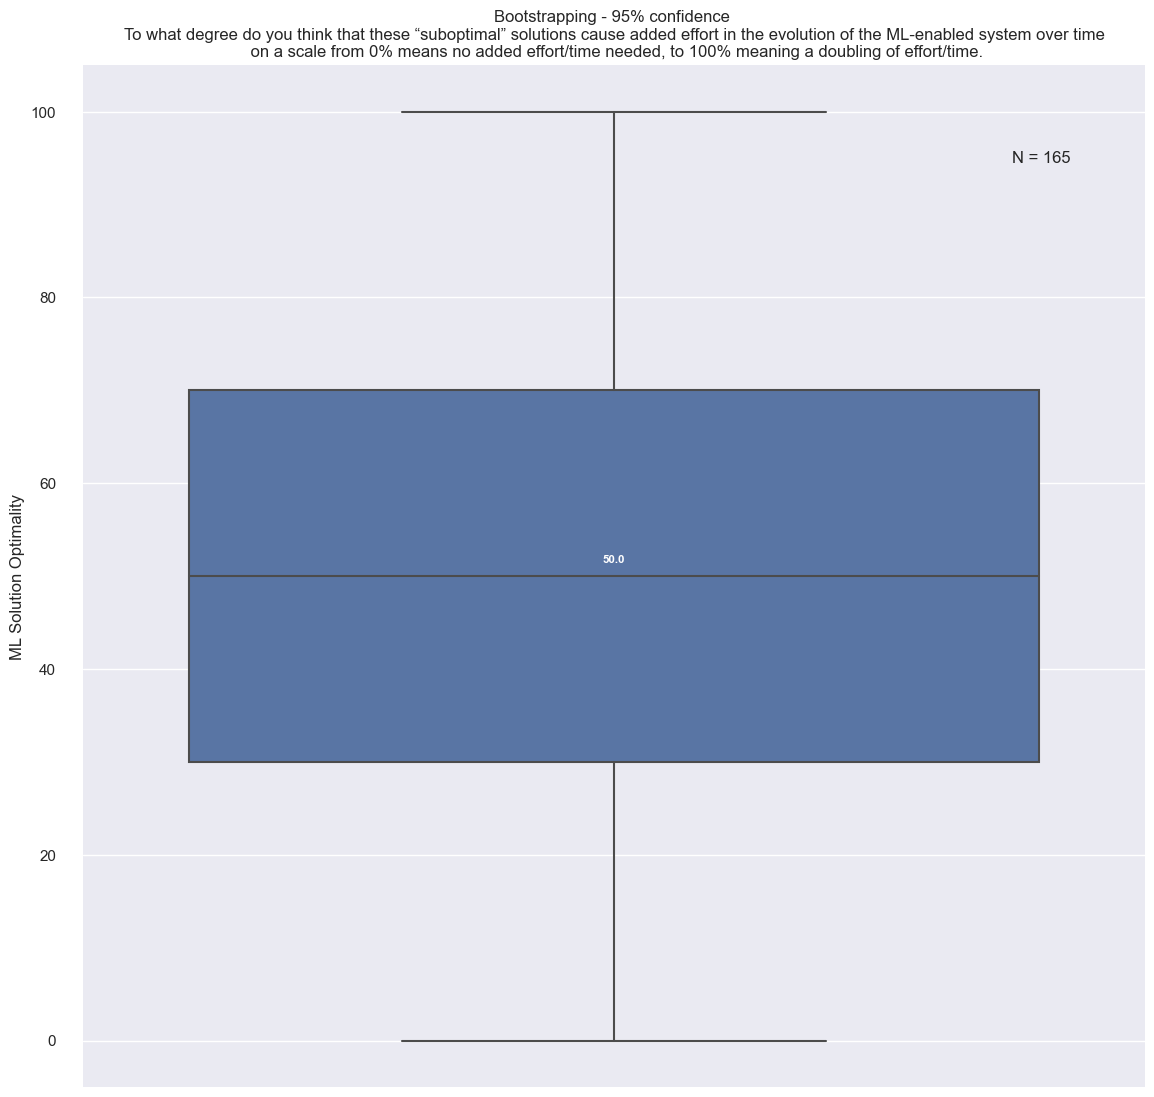

In [17]:
# compute total of answer considered in this question
total_answers = "N = " + str(len(dataframe_obj.df['Q7_ML_Solution_Optimality_Extra_Effort']))

q7_boot_plot.single_boxplot("ML Solution Optimality", outliers=False,
                            title="Bootstrapping - 95% confidence \nTo what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.",
                            total_answers=total_answers)

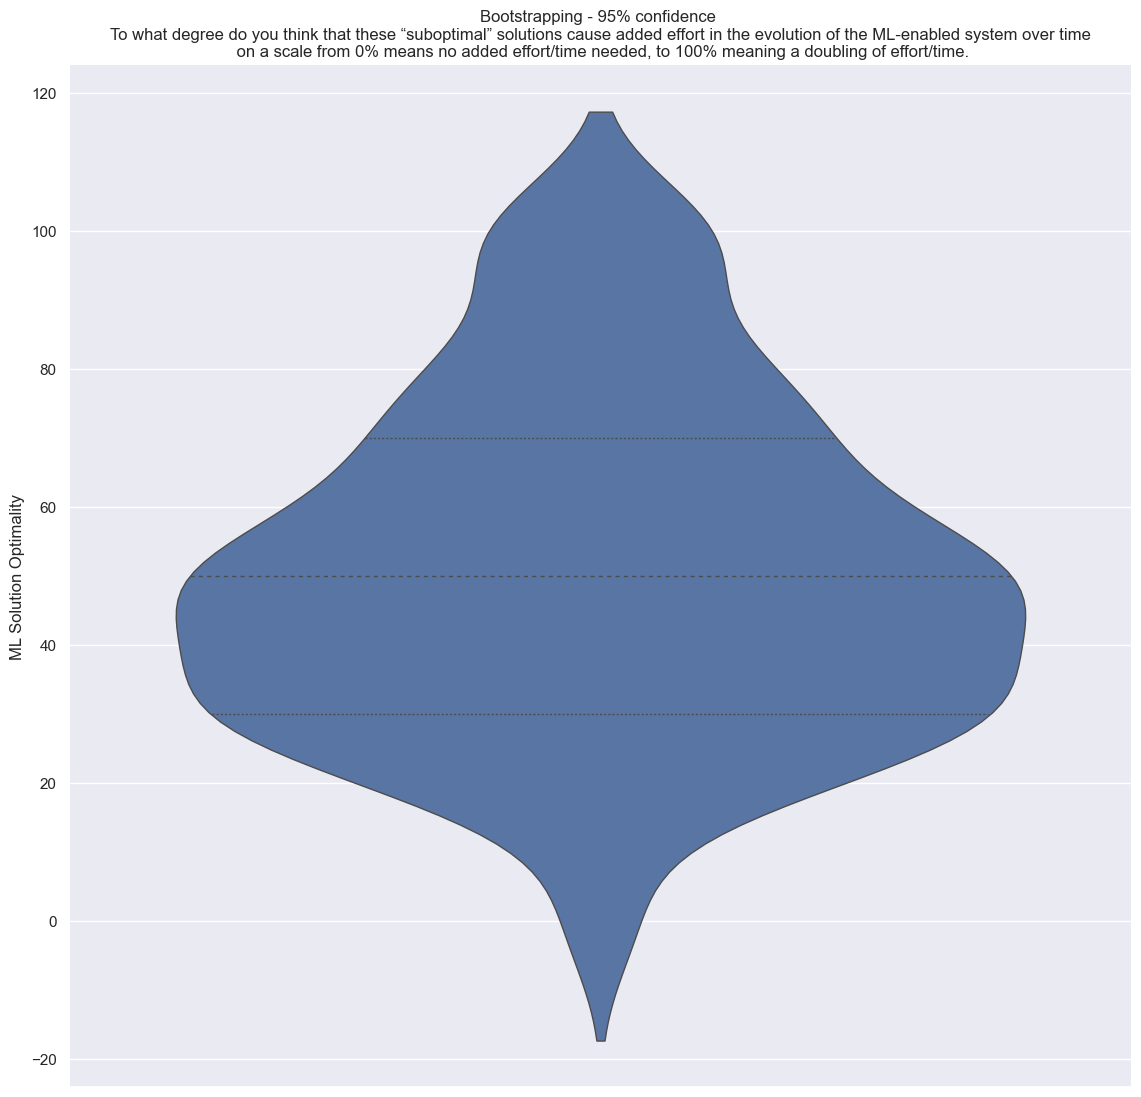

In [18]:
q7_boot_plot.single_violinplot("ML Solution Optimality",
                               title="Bootstrapping - 95% confidence \nTo what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.")

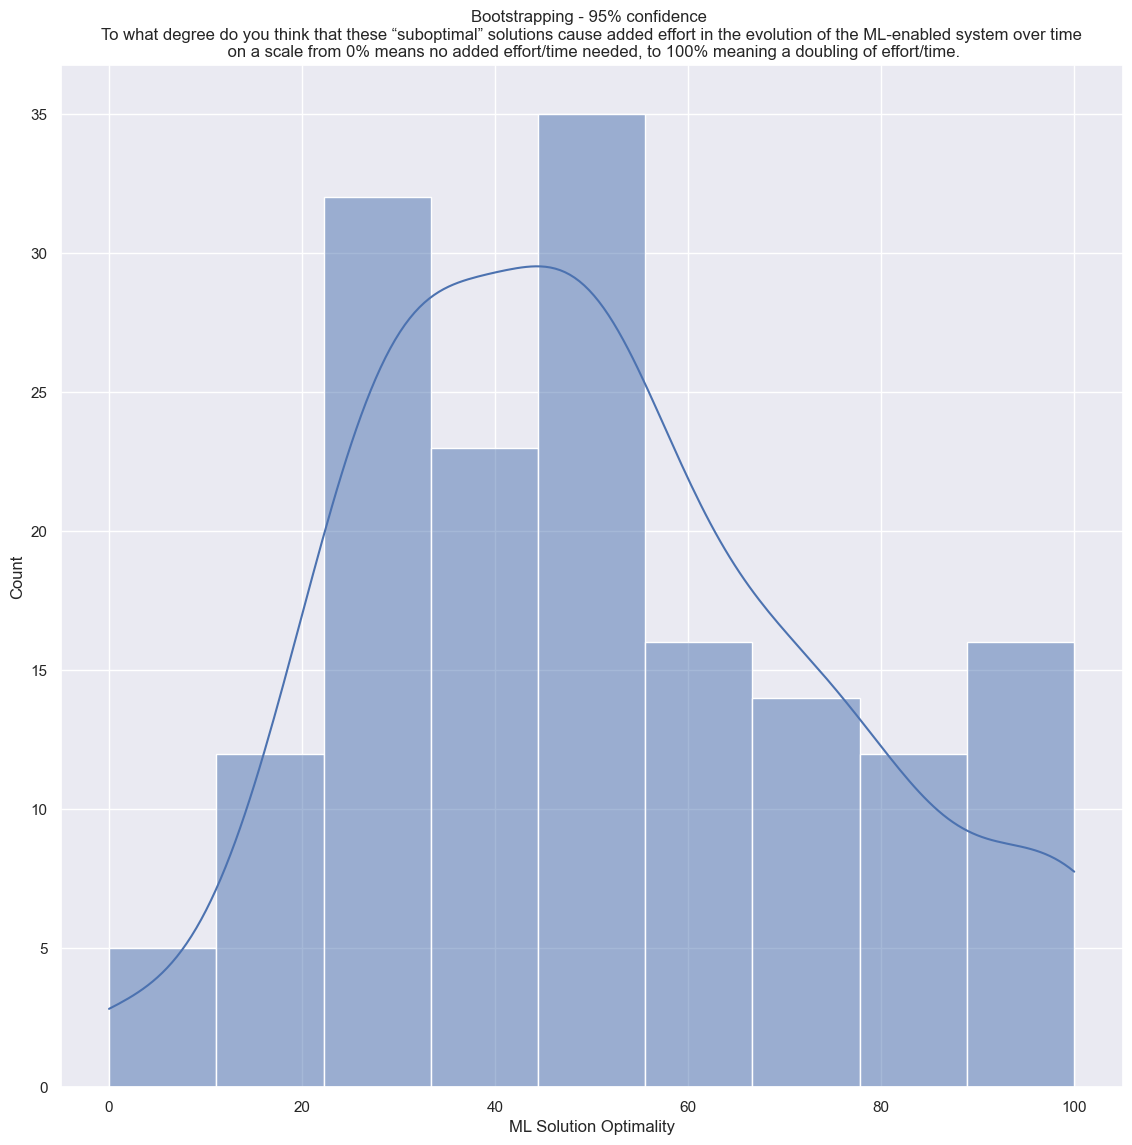

In [19]:
q7_boot_plot.single_histplot("ML Solution Optimality",
                             title="Bootstrapping - 95% confidence \nTo what degree do you think that these “suboptimal” solutions cause added effort in the evolution of the ML-enabled system over time\n on a scale from 0% means no added effort/time needed, to 100% meaning a doubling of effort/time.")

In [20]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
print(bootstrapped_list_data['confidence'])

Option: (Lower Value, Mean, Upper Value)
(46.728652870327196, 50.4, 54.0713471296728)
